# Introduction

~~~~~~~

# Import Libraries

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import size
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import plotly.express as px


# Get the data from Yfinancial

In [3]:
start = "2014-09-17"
end = "2024-02-05"
symbol = {"^GSPC", "GC=F", "EURUSD=X", "^TNX", "BTC-USD", "BZ=F"}
df = yf.download(symbol, start, end, auto_adjust=True)
df

[*********************100%%**********************]  6 of 6 completed


Price              Close                                                 \
Ticker           BTC-USD       BZ=F  EURUSD=X         GC=F        ^GSPC   
Date                                                                      
2014-09-17    457.334015  98.970001  1.295908  1234.400024  2001.569946   
2014-09-18    424.440002  97.699997  1.285000  1225.699951  2011.359985   
2014-09-19    394.795990  98.389999  1.292006  1215.300049  2010.400024   
2014-09-20    408.903992        NaN       NaN          NaN          NaN   
2014-09-21    398.821014        NaN       NaN          NaN          NaN   
...                  ...        ...       ...          ...          ...   
2024-01-31  42582.605469  81.709999  1.084340  2048.399902  4845.649902   
2024-02-01  43075.773438  78.699997  1.080392  2053.000000  4906.189941   
2024-02-02  43185.859375  77.330002  1.087465  2036.099976  4958.609863   
2024-02-03  42992.250000        NaN       NaN          NaN          NaN   
2024-02-04  42583.582031        NaN       NaN          NaN          NaN   

Price                      High                                    ...  \
Ticker       ^TNX       BTC-USD       BZ=F  EURUSD=X         GC=F  ...   
Date                                                               ...   
2014-09-17  2.600    468.174011  99.540001  1.298000  1236.199951  ...   
2014-09-18  2.629    456.859985  99.139999  1.292689  1225.699951  ...   
2014-09-19  2.587    427.834991  98.480003  1.292959  1218.300049  ...   
2014-09-20    NaN    423.295990        NaN       NaN          NaN  ...   
2014-09-21    NaN    412.425995        NaN       NaN          NaN  ...   
...           ...           ...        ...       ...          ...  ...   
2024-01-31  3.967  43717.406250  82.800003  1.088566  2055.000000  ...   
2024-02-01  3.863  43243.167969  81.550003  1.086555  2064.500000  ...   
2024-02-02  4.033  43422.488281  79.440002  1.089800  2055.899902  ...   
2024-02-03    NaN  43359.941406        NaN       NaN          NaN  ...   
2024-02-04    NaN  43097.644531        NaN       NaN          NaN  ...   

Price           Open                                        Volume           \
Ticker      EURUSD=X         GC=F        ^GSPC   ^TNX      BTC-USD     BZ=F   
Date                                                                          
2014-09-17  1.295908  1236.199951  1999.300049  2.578     21056800  14769.0   
2014-09-18  1.285017  1216.199951  2003.069946  2.625     34483200  15316.0   
2014-09-19  1.292140  1218.300049  2012.739990  2.611     37919700  12442.0   
2014-09-20       NaN          NaN          NaN    NaN     36863600      NaN   
2014-09-21       NaN          NaN          NaN    NaN     26580100      NaN   
...              ...          ...          ...    ...          ...      ...   
2024-01-31  1.084340  2035.400024  4899.189941  4.020  24673628793  33486.0   
2024-02-01  1.080392  2040.199951  4861.109863  3.927  21423953779  48919.0   
2024-02-02  1.087465  2054.800049  4916.060059  3.889  18603843039  32405.0   
2024-02-03       NaN          NaN          NaN    NaN  11169245236      NaN   
2024-02-04       NaN          NaN          NaN    NaN  14802225490      NaN   

Price                                           
Ticker     EURUSD=X    GC=F         ^GSPC ^TNX  
Date                                            
2014-09-17      0.0    10.0  3.209420e+09  0.0  
2014-09-18      0.0     5.0  3.235340e+09  0.0  
2014-09-19      0.0     4.0  4.880220e+09  0.0  
2014-09-20      NaN     NaN           NaN  NaN  
2014-09-21      NaN     NaN           NaN  NaN  
...             ...     ...           ...  ...  
2024-01-31      0.0  2007.0  4.696120e+09  0.0  
2024-02-01      0.0   947.0  4.386090e+09  0.0  
2024-02-02      0.0   888.0  3.974350e+09  0.0  
2024-02-03      NaN     NaN           NaN  NaN  
2024-02-04      NaN     NaN           NaN  NaN  

[3428 rows x 30 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3428 entries, 2014-09-17 to 2024-02-04
Freq: D
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BTC-USD)    3428 non-null   float64
 1   (Close, BZ=F)       2356 non-null   float64
 2   (Close, EURUSD=X)   2445 non-null   float64
 3   (Close, GC=F)       2360 non-null   float64
 4   (Close, ^GSPC)      2361 non-null   float64
 5   (Close, ^TNX)       2359 non-null   float64
 6   (High, BTC-USD)     3428 non-null   float64
 7   (High, BZ=F)        2356 non-null   float64
 8   (High, EURUSD=X)    2445 non-null   float64
 9   (High, GC=F)        2360 non-null   float64
 10  (High, ^GSPC)       2361 non-null   float64
 11  (High, ^TNX)        2359 non-null   float64
 12  (Low, BTC-USD)      3428 non-null   float64
 13  (Low, BZ=F)         2356 non-null   float64
 14  (Low, EURUSD=X)     2445 non-null   float64
 15  (Low, GC=F)         2360 non-

In [10]:
df.shape

(3428, 30)

# Data Preprocessing

### Delete unnecessary columns - High, Low, Open, Volume

In [4]:
df = df.drop(columns=["High", "Low", "Open", "Volume"])
df


Price              Close                                                      
Ticker           BTC-USD       BZ=F  EURUSD=X         GC=F        ^GSPC   ^TNX
Date                                                                          
2014-09-17    457.334015  98.970001  1.295908  1234.400024  2001.569946  2.600
2014-09-18    424.440002  97.699997  1.285000  1225.699951  2011.359985  2.629
2014-09-19    394.795990  98.389999  1.292006  1215.300049  2010.400024  2.587
2014-09-20    408.903992        NaN       NaN          NaN          NaN    NaN
2014-09-21    398.821014        NaN       NaN          NaN          NaN    NaN
...                  ...        ...       ...          ...          ...    ...
2024-01-31  42582.605469  81.709999  1.084340  2048.399902  4845.649902  3.967
2024-02-01  43075.773438  78.699997  1.080392  2053.000000  4906.189941  3.863
2024-02-02  43185.859375  77.330002  1.087465  2036.099976  4958.609863  4.033
2024-02-03  42992.250000        NaN       NaN          NaN          NaN    NaN
2024-02-04  42583.582031        NaN       NaN          NaN          NaN    NaN

[3428 rows x 6 columns]

In [5]:
df = pd.DataFrame(df['Close'])
df

Ticker,BTC-USD,BZ=F,EURUSD=X,GC=F,^GSPC,^TNX
Date,,,,,,
2014-09-17,457.334015,98.970001,1.295908,1234.400024,2001.569946,2.600
2014-09-18,424.440002,97.699997,1.285000,1225.699951,2011.359985,2.629
2014-09-19,394.795990,98.389999,1.292006,1215.300049,2010.400024,2.587
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-31,42582.605469,81.709999,1.084340,2048.399902,4845.649902,3.967
2024-02-01,43075.773438,78.699997,1.080392,2053.000000,4906.189941,3.863
2024-02-02,43185.859375,77.330002,1.087465,2036.099976,4958.609863,4.033


In [13]:
df = df.rename_axis('', axis=1)
df

,BTC-USD,BZ=F,EURUSD=X,GC=F,^GSPC,^TNX
Date,,,,,,
2014-09-17,457.334015,98.970001,1.295908,1234.400024,2001.569946,2.600
2014-09-18,424.440002,97.699997,1.285000,1225.699951,2011.359985,2.629
2014-09-19,394.795990,98.389999,1.292006,1215.300049,2010.400024,2.587
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-31,42582.605469,81.709999,1.084340,2048.399902,4845.649902,3.967
2024-02-01,43075.773438,78.699997,1.080392,2053.000000,4906.189941,3.863
2024-02-02,43185.859375,77.330002,1.087465,2036.099976,4958.609863,4.033


### Naming each investment assets

In [6]:
new_column_names = ['Bitcoin', 'CrudeOil', 'EuroUSD', 'Gold', 'S&P500', '10Y_Treasury']
df.columns = new_column_names
df

,Bitcoin,CrudeOil,EuroUSD,Gold,S&P500,10Y_Treasury
Date,,,,,,
2014-09-17,457.334015,98.970001,1.295908,1234.400024,2001.569946,2.600
2014-09-18,424.440002,97.699997,1.285000,1225.699951,2011.359985,2.629
2014-09-19,394.795990,98.389999,1.292006,1215.300049,2010.400024,2.587
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-31,42582.605469,81.709999,1.084340,2048.399902,4845.649902,3.967
2024-02-01,43075.773438,78.699997,1.080392,2053.000000,4906.189941,3.863
2024-02-02,43185.859375,77.330002,1.087465,2036.099976,4958.609863,4.033


### Reordering based on the nature of investment assets


In [7]:
desired_order = ['S&P500', 'Gold', 'CrudeOil', '10Y_Treasury', 'EuroUSD', 'Bitcoin']
df = df[desired_order]
df

,S&P500,Gold,CrudeOil,10Y_Treasury,EuroUSD,Bitcoin
Date,,,,,,
2014-09-17,2001.569946,1234.400024,98.970001,2.600,1.295908,457.334015
2014-09-18,2011.359985,1225.699951,97.699997,2.629,1.285000,424.440002
2014-09-19,2010.400024,1215.300049,98.389999,2.587,1.292006,394.795990
2014-09-20,NaN,NaN,NaN,NaN,NaN,408.903992
2014-09-21,NaN,NaN,NaN,NaN,NaN,398.821014
...,...,...,...,...,...,...
2024-01-31,4845.649902,2048.399902,81.709999,3.967,1.084340,42582.605469
2024-02-01,4906.189941,2053.000000,78.699997,3.863,1.080392,43075.773438
2024-02-02,4958.609863,2036.099976,77.330002,4.033,1.087465,43185.859375


### Removing NaN values

In [8]:
df = df.dropna()
df

,S&P500,Gold,CrudeOil,10Y_Treasury,EuroUSD,Bitcoin
Date,,,,,,
2014-09-17,2001.569946,1234.400024,98.970001,2.600,1.295908,457.334015
2014-09-18,2011.359985,1225.699951,97.699997,2.629,1.285000,424.440002
2014-09-19,2010.400024,1215.300049,98.389999,2.587,1.292006,394.795990
2014-09-22,1994.290039,1216.800049,96.970001,2.566,1.284142,402.152008
2014-09-23,1982.770020,1221.000000,96.849998,2.535,1.285149,435.790985
...,...,...,...,...,...,...
2024-01-29,4927.930176,2025.199951,82.400002,4.091,1.084352,43288.246094
2024-01-30,4924.970215,2031.500000,82.870003,4.059,1.083447,42952.609375
2024-01-31,4845.649902,2048.399902,81.709999,3.967,1.084340,42582.605469


In [9]:
df.describe()

,S&P500,Gold,CrudeOil,10Y_Treasury,EuroUSD,Bitcoin
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,3108.020384,1511.020212,65.556911,2.304491,1.126840,14873.008830
std,892.491165,302.416561,18.787512,0.925938,0.057094,16371.100200
min,1829.079956,1050.800049,19.330000,0.499000,0.959619,178.102997
25%,2272.577393,1243.699951,50.929998,1.683250,1.088898,924.787506
50%,2878.125000,1352.649963,64.009998,2.234000,1.121768,8314.379395
75%,3972.275085,1809.875000,77.909998,2.856750,1.169085,24976.110352
max,4958.609863,2081.899902,127.980003,4.988000,1.295908,67566.828125


## Initial Visualization

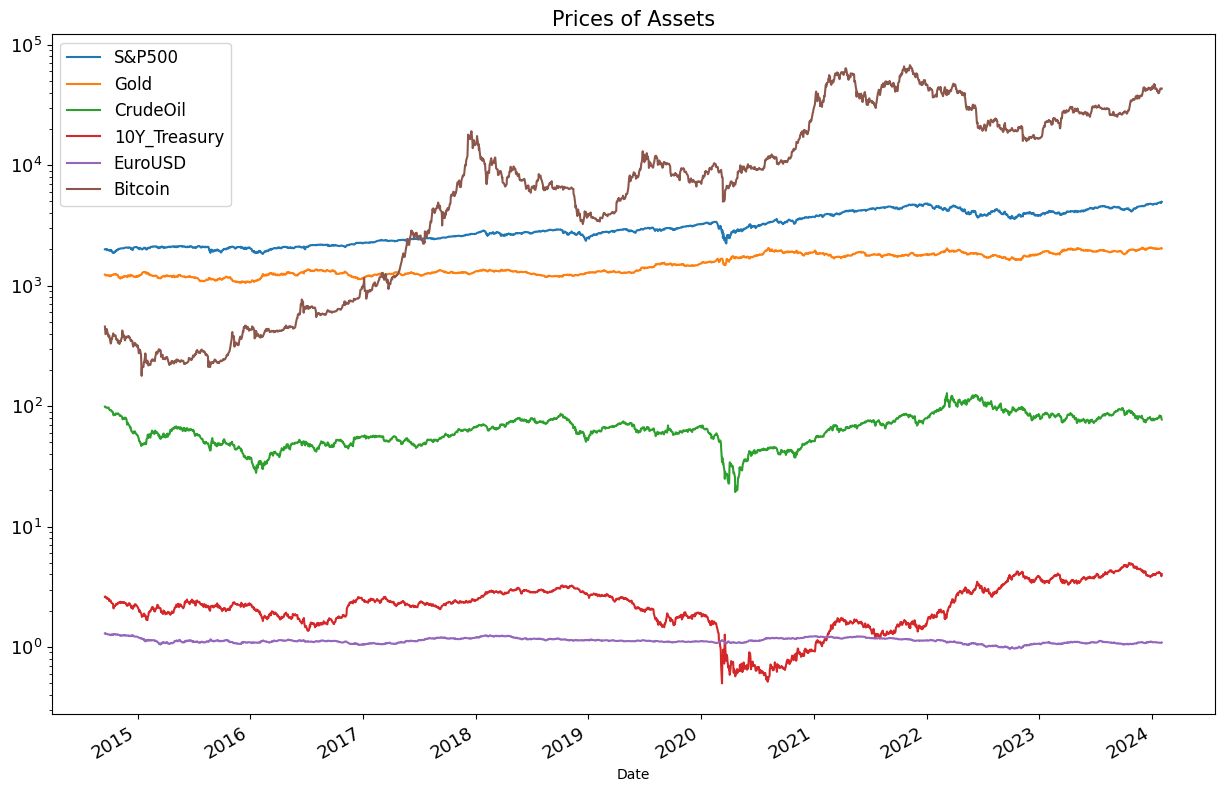

In [10]:
df.plot(figsize=(15, 10), fontsize=13, logy=True)
plt.title("Prices of Assets", fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.show()

## ADF test - Non-stationary(except Euro)

In [13]:
result_dict = {}
for column in df.columns:
    result = adfuller(df[column], autolag='AIC')
    result_dict[column] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

for column, result in result_dict.items():
    print(f"Results for {column}:")
    print(f"ADF Statistic: {result['ADF Statistic']}")
    print(f"p-value: {result['p-value']}")
    print(f"Critical Values: {result['Critical Values']}")
    print("Is Stationary:", "No (fail to reject)" if result['p-value'] > 0.05 else "Yes (reject)")
    print()

Results for S&P500:
ADF Statistic: -0.21438346508091494
p-value: 0.9367852884902151
Critical Values: {'1%': -3.4331488418513514, '5%': -2.8627764760555725, '10%': -2.567428230414952}
Is Stationary: No (fail to reject)

Results for Gold:
ADF Statistic: -0.5260769947367231
p-value: 0.8868265087740681
Critical Values: {'1%': -3.43314525271574, '5%': -2.862774891185521, '10%': -2.5674273865936037}
Is Stationary: No (fail to reject)

Results for CrudeOil:
ADF Statistic: -2.21478075064324
p-value: 0.20092469987653938
Critical Values: {'1%': -3.4331440583819224, '5%': -2.8627743637979775, '10%': -2.5674271058003892}
Is Stationary: No (fail to reject)

Results for 10Y_Treasury:
ADF Statistic: -0.8684770423367043
p-value: 0.7981760889541334
Critical Values: {'1%': -3.4331657137546037, '5%': -2.8627839262289756, '10%': -2.567432197063244}
Is Stationary: No (fail to reject)

Results for EuroUSD:
ADF Statistic: -3.311591561030855
p-value: 0.014368215830018712
Critical Values: {'1%': -3.43313691375

### Making data to be stationary - calculate chage rate

In [14]:
# change rage
df_rate = df.pct_change()
df_rate = df_rate.dropna()
df_rate = df_rate * 100
df_rate

,S&P500,Gold,CrudeOil,10Y_Treasury,EuroUSD,Bitcoin
Date,,,,,,
2014-09-18,0.489118,-0.704802,-1.283221,1.115386,-0.841681,-7.192558
2014-09-19,-0.047727,-0.848487,0.706246,-1.597568,0.545227,-6.984265
2014-09-22,-0.801332,0.123426,-1.443234,-0.811748,-0.608684,1.863245
2014-09-23,-0.577650,0.345164,-0.123752,-1.208102,0.078396,8.364742
2014-09-24,0.783249,-0.196562,0.103251,1.341220,0.019275,-2.888081
...,...,...,...,...,...,...
2024-01-29,0.755677,0.416497,-1.376423,-1.658648,-0.032530,3.518616
2024-01-30,-0.060065,0.311083,0.570390,-0.782206,-0.083430,-0.775353
2024-01-31,-1.610574,0.831893,-1.399787,-2.266568,0.082411,-0.861424


In [15]:
# ADF test for change rate data

result_dict = {}
for column in df_rate.columns:
    result = adfuller(df_rate[column], autolag='AIC')
    result_dict[column] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

for column, result in result_dict.items():
    print(f"Results for {column}:")
    print(f"ADF Statistic: {result['ADF Statistic']}")
    print(f"p-value: {result['p-value']}")
    print(f"Critical Values: {result['Critical Values']}")
    print("Is Stationary:", "No (fail to reject)" if result['p-value'] > 0.05 else "Yes (reject)")
    print()

Results for S&P500:
ADF Statistic: -15.305282941906388
p-value: 4.258305841125593e-28
Critical Values: {'1%': -3.4331488418513514, '5%': -2.8627764760555725, '10%': -2.567428230414952}
Is Stationary: Yes (reject)

Results for Gold:
ADF Statistic: -49.76758325472635
p-value: 0.0
Critical Values: {'1%': -3.4331381019893814, '5%': -2.862771733602851, '10%': -2.567425705424748}
Is Stationary: Yes (reject)

Results for CrudeOil:
ADF Statistic: -23.64467790737581
p-value: 0.0
Critical Values: {'1%': -3.4331416727735093, '5%': -2.862773310373135, '10%': -2.567426544932965}
Is Stationary: Yes (reject)

Results for 10Y_Treasury:
ADF Statistic: -8.425177793389794
p-value: 1.9355367635337365e-13
Critical Values: {'1%': -3.433170571724553, '5%': -2.862786071368528, '10%': -2.567433339187506}
Is Stationary: Yes (reject)

Results for EuroUSD:
ADF Statistic: -21.234966246161054
p-value: 0.0
Critical Values: {'1%': -3.4331440583819224, '5%': -2.8627743637979775, '10%': -2.5674271058003892}
Is Stationa

## Building up and comapring ML Models - ARIMA / SARIMA / SARIMAX

In [16]:
df_rate = pd.DataFrame(df_rate)
df_rate.reset_index(inplace=True)
df_rate

,Date,S&P500,Gold,CrudeOil,10Y_Treasury,EuroUSD,Bitcoin
0,2014-09-18,0.489118,-0.704802,-1.283221,1.115386,-0.841681,-7.192558
1,2014-09-19,-0.047727,-0.848487,0.706246,-1.597568,0.545227,-6.984265
2,2014-09-22,-0.801332,0.123426,-1.443234,-0.811748,-0.608684,1.863245
3,2014-09-23,-0.577650,0.345164,-0.123752,-1.208102,0.078396,8.364742
4,2014-09-24,0.783249,-0.196562,0.103251,1.341220,0.019275,-2.888081
...,...,...,...,...,...,...,...
2344,2024-01-29,0.755677,0.416497,-1.376423,-1.658648,-0.032530,3.518616
2345,2024-01-30,-0.060065,0.311083,0.570390,-0.782206,-0.083430,-0.775353
2346,2024-01-31,-1.610574,0.831893,-1.399787,-2.266568,0.082411,-0.861424
2347,2024-02-01,1.249369,0.224570,-3.683762,-2.621631,-0.364090,1.158144


In [17]:
# Seperate Train & Test dataset
train_size = int(len(df_rate) * 0.8)
train, test = df_rate.iloc[:train_size], df_rate.iloc[train_size:]

In [136]:
# ARIMA model
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test)).values

# Compare forcast and acutal result
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

# Result
print("ARIMA RMSE:", arima_rmse)



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [107]:


# ARIMA 모델


# SARIMA 모델
sarima_model = SARIMAX(train['S&P500'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))


# SARIMAX 모델
train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)
exog_train = np.asarray(train.drop(columns=['S&P500']))
exog_test = np.asarray(test.drop(columns=['S&P500']))
sarimax_model = SARIMAX(train['S&P500'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)

# 예측값과 실제값 비교
arima_rmse = np.sqrt(mean_squared_error(test['S&P500'], arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test['S&P500'], sarima_forecast))
sarimax_rmse = np.sqrt(mean_squared_error(test['S&P500'], sarimax_forecast))

print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)
print("SARIMAX RMSE:", sarimax_rmse)



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77277D+00    |proj g|=  2.13870D-01

At iterate    5    f=  1.57291D+00    |proj g|=  1.03600D-01

At iterate   10    f=  1.54103D+00    |proj g|=  1.50411D-02

At iterate   15    f=  1.53639D+00    |proj g|=  1.13238D-02

At iterate   20    f=  1.53594D+00    |proj g|=  2.70329D-03

At iterate   25    f=  1.53590D+00    |proj g|=  8.95346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67547D+00    |proj g|=  1.06327D+22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      1     21      1     0     0   1.063D+22   1.675D+00
  F =   1.6754700131956166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA RMSE: 1.5451181627440294
SARIMA RMSE: 1.196267210873102
SARIMAX RMSE: 7.566567098830238


In [ ]:

# Prophet 모델
prophet_df_rate = train.reset_index().rename(columns={'Date':'ds', 'S&P500':'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df_rate)
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)
prophet_forecast = forecast['yhat'][train_size:]

# 예측값과 실제값 비교
arima_rmse = np.sqrt(mean_squared_error(test['S&P500'], arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test['S&P500'], sarima_forecast))
sarimax_rmse = np.sqrt(mean_squared_error(test['S&P500'], sarimax_forecast))
prophet_rmse = np.sqrt(mean_squared_error(test['S&P500'], prophet_forecast))

print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)
print("SARIMAX RMSE:", sarimax_rmse)
print("Prophet RMSE:", prophet_rmse)

## Time Series Decomposition

### Additive Decomposition

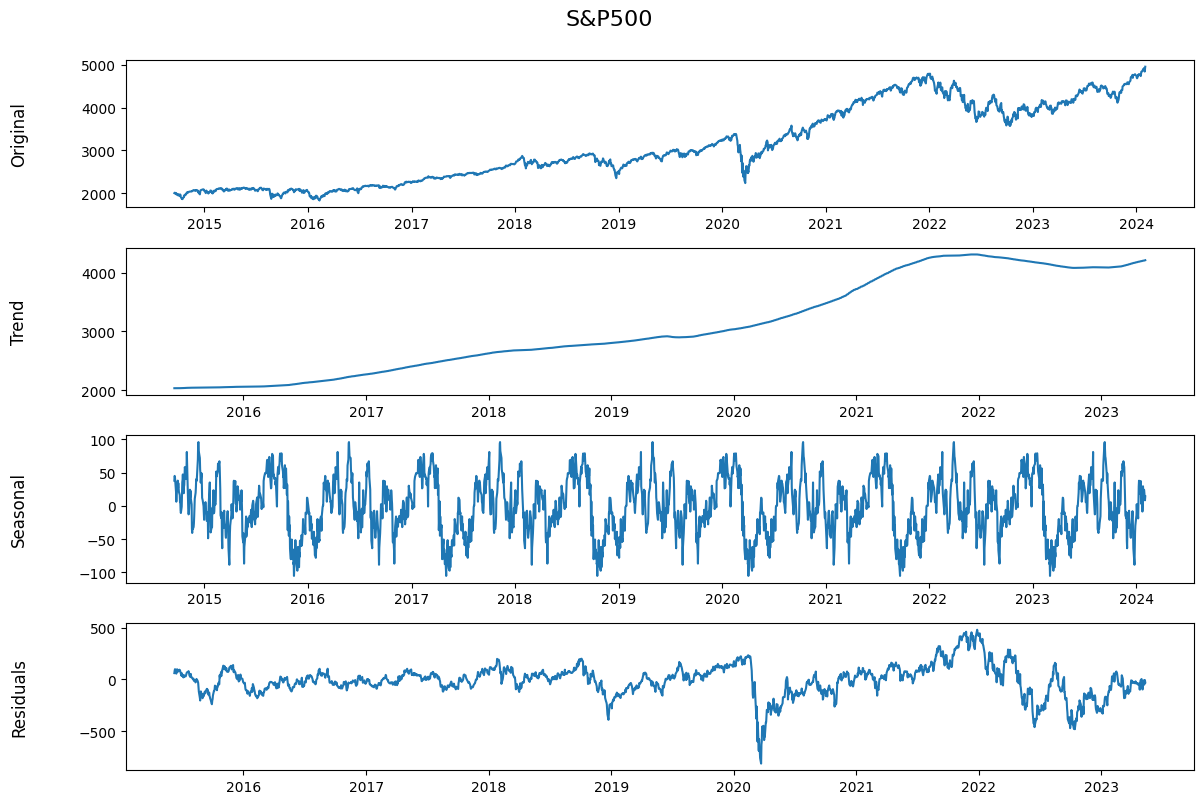

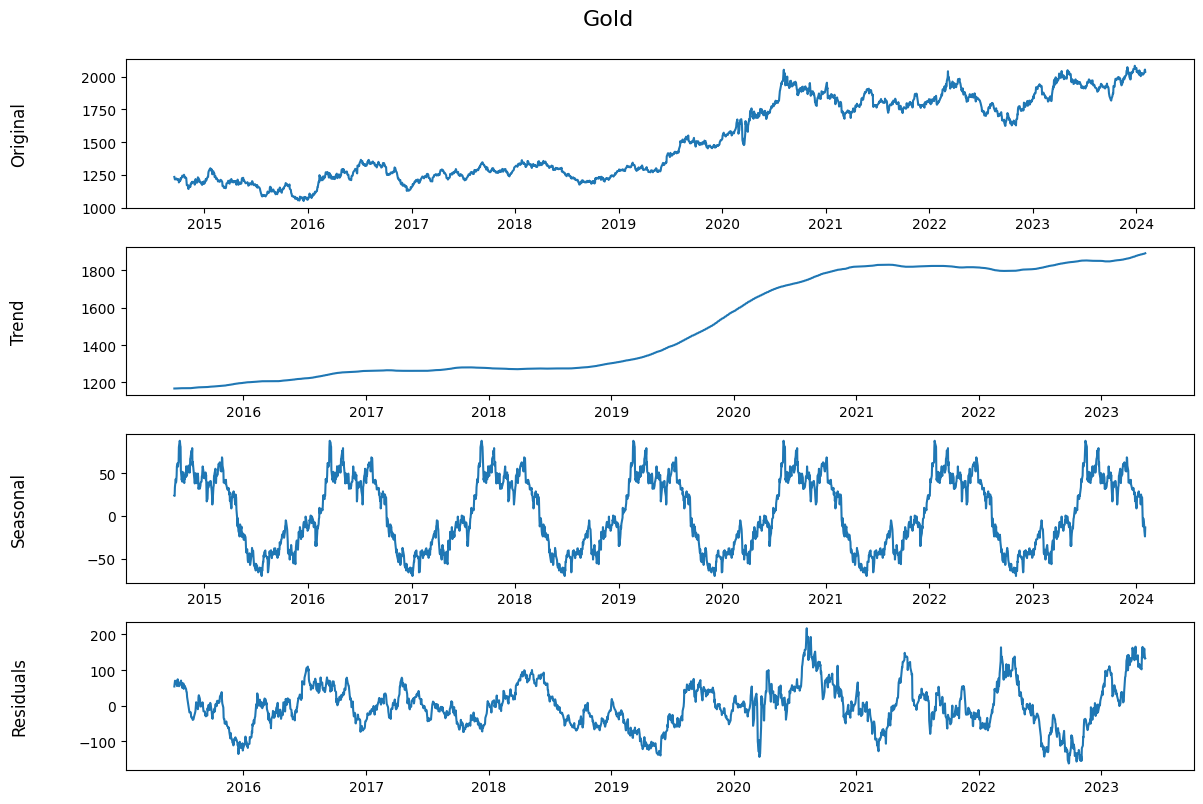

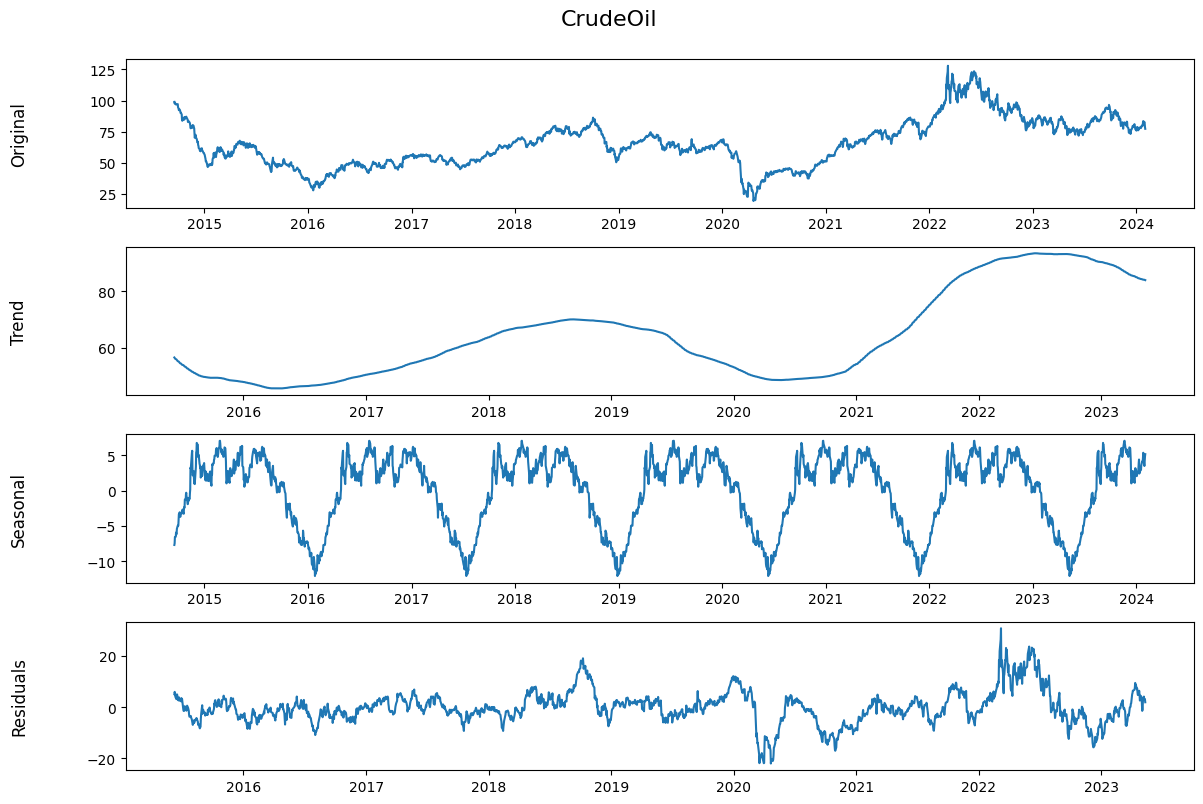

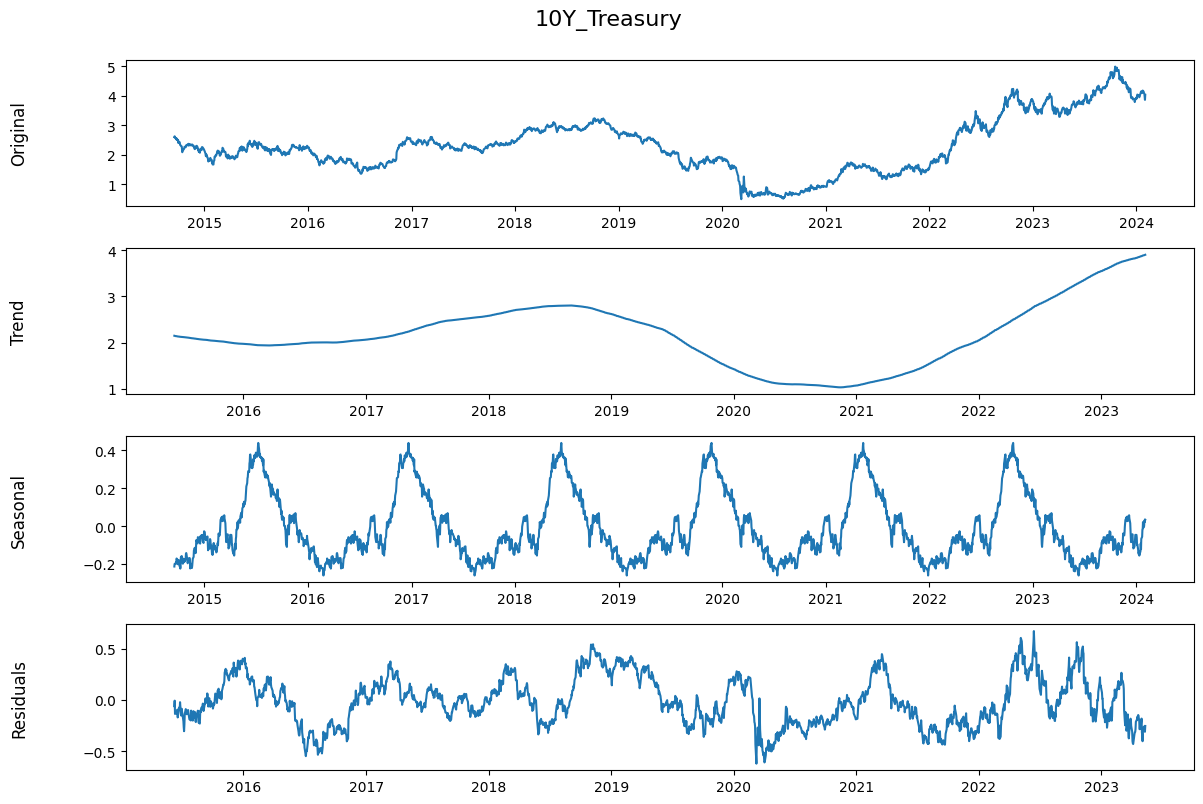

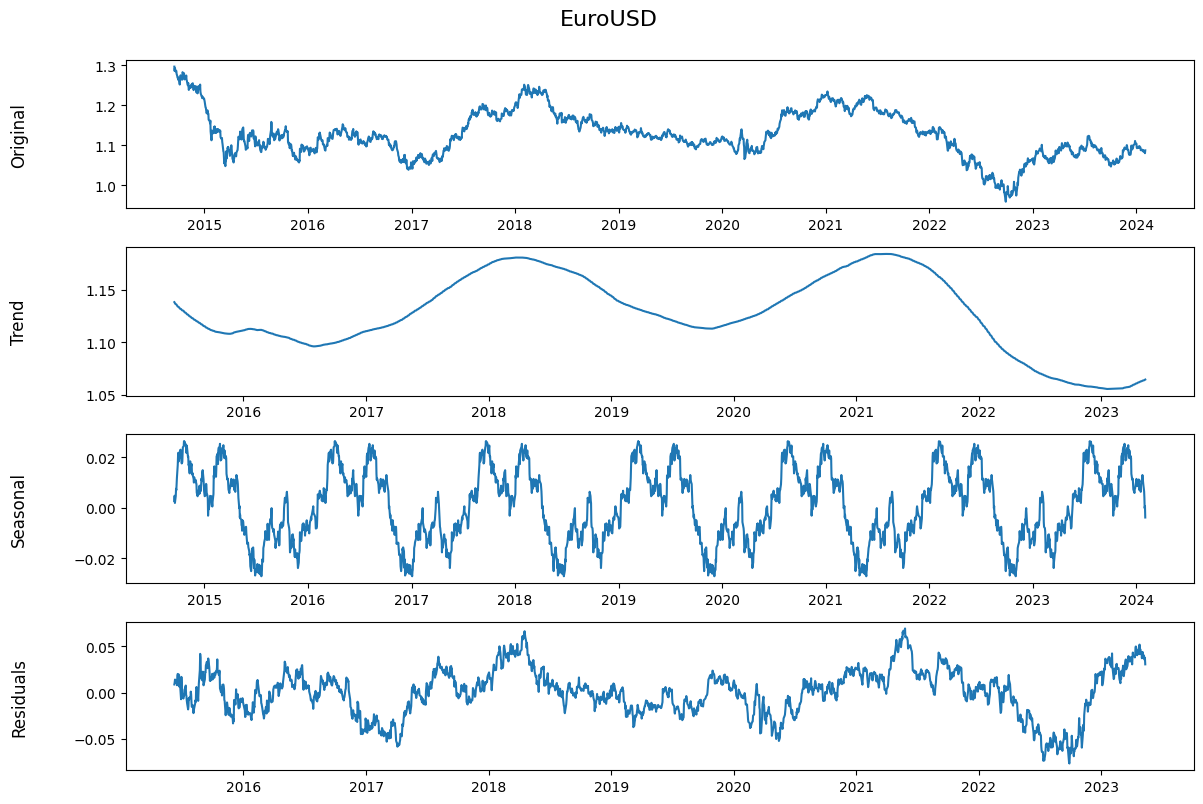

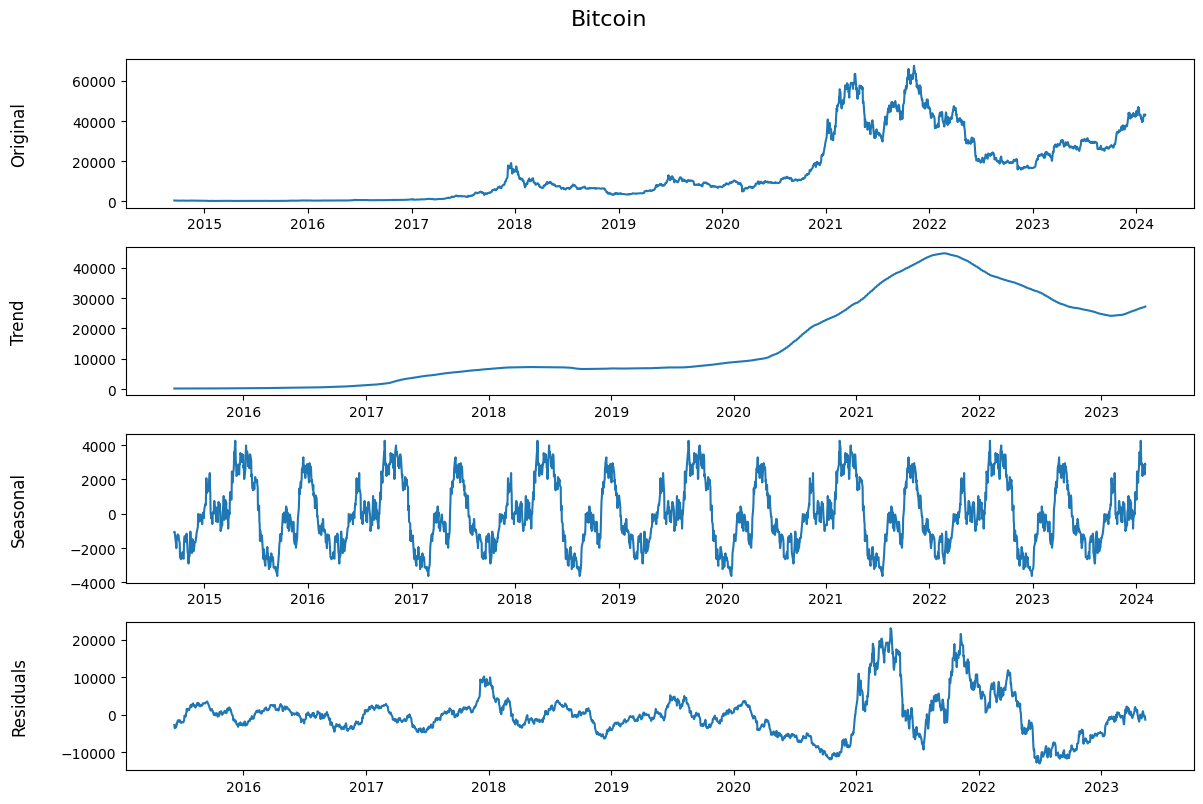

In [37]:
seasonal_period = 365  

for column in df:
    result = seasonal_decompose(df[column], model='additive', period=seasonal_period)

    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # visualization
    plt.figure(figsize=(12, 8))

    plt.suptitle(column, y=1, fontsize=16)

    plt.subplot(411)
    plt.plot(df[column], label='original')
    plt.annotate('Original', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(412)
    plt.plot(trend, label='trend')
    plt.annotate('Trend', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(413)
    plt.plot(seasonal, label='seasonality')
    plt.annotate('Seasonal', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(414)
    plt.plot(residual, label='residuals')
    plt.annotate('Residuals', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.tight_layout()
    plt.show()


### Multiplicative Decomposition

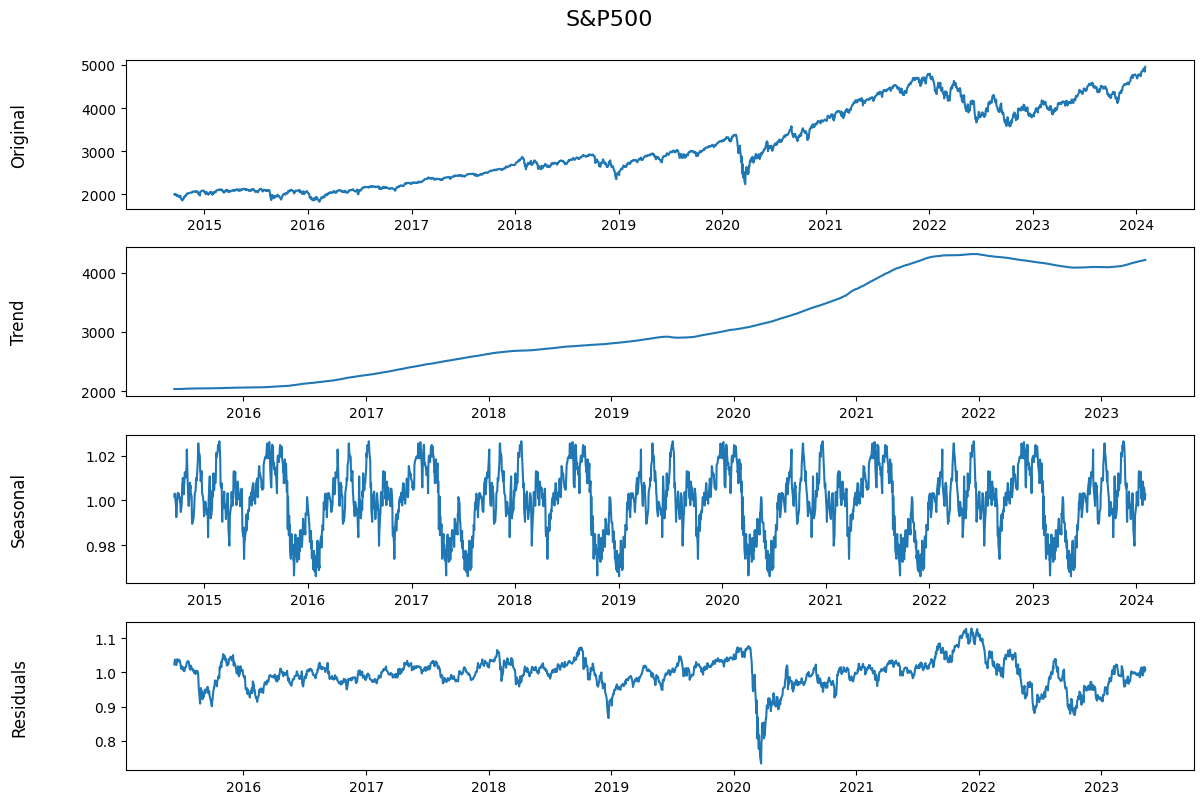

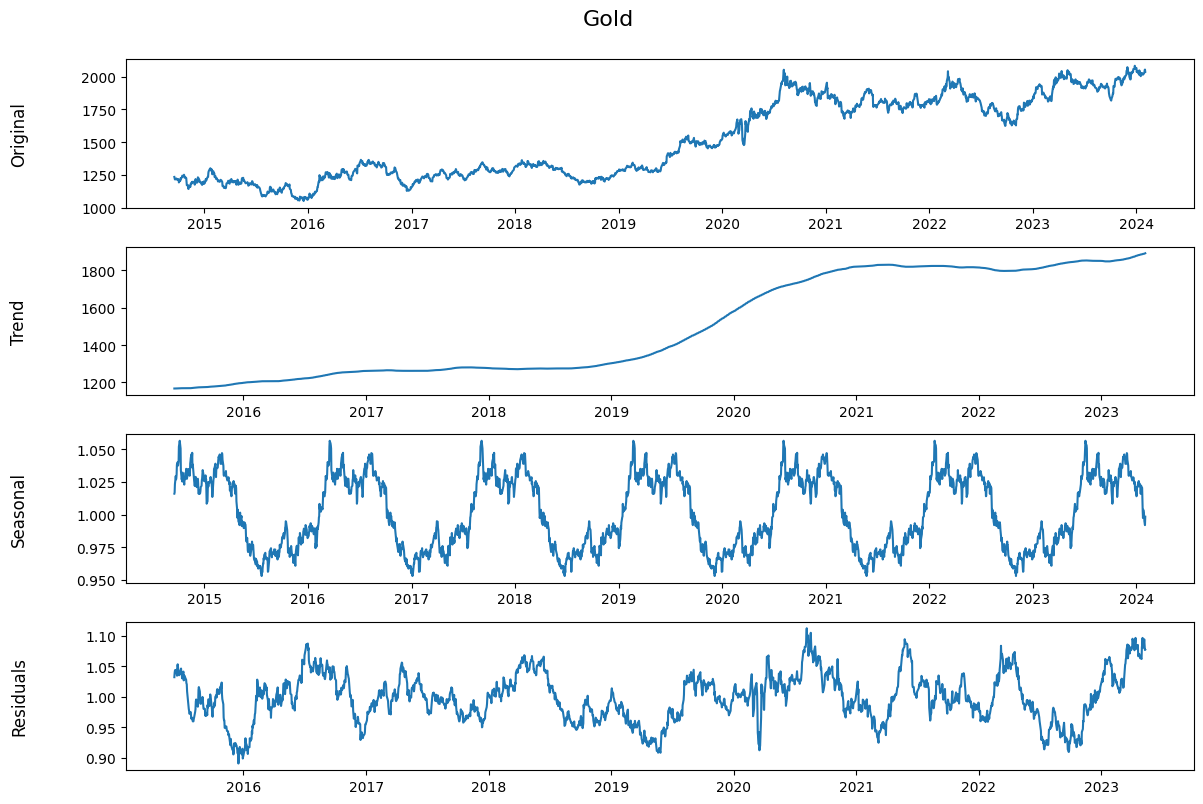

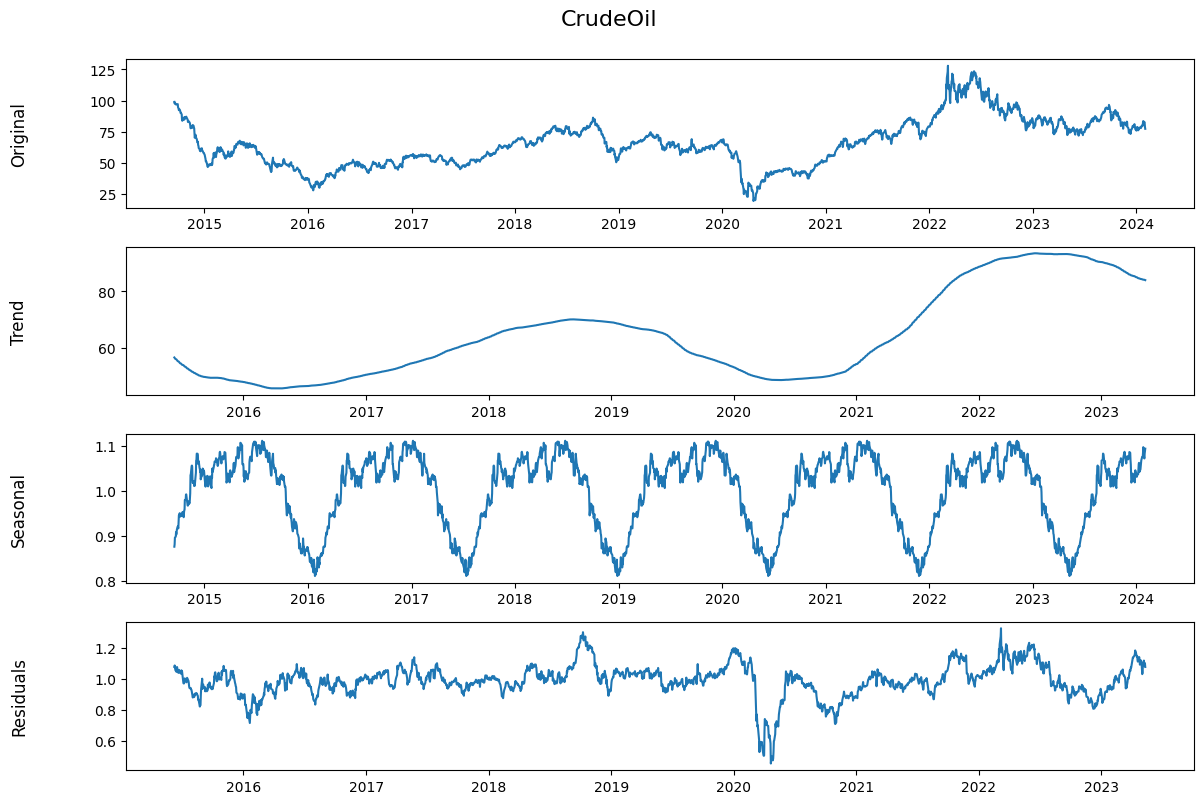

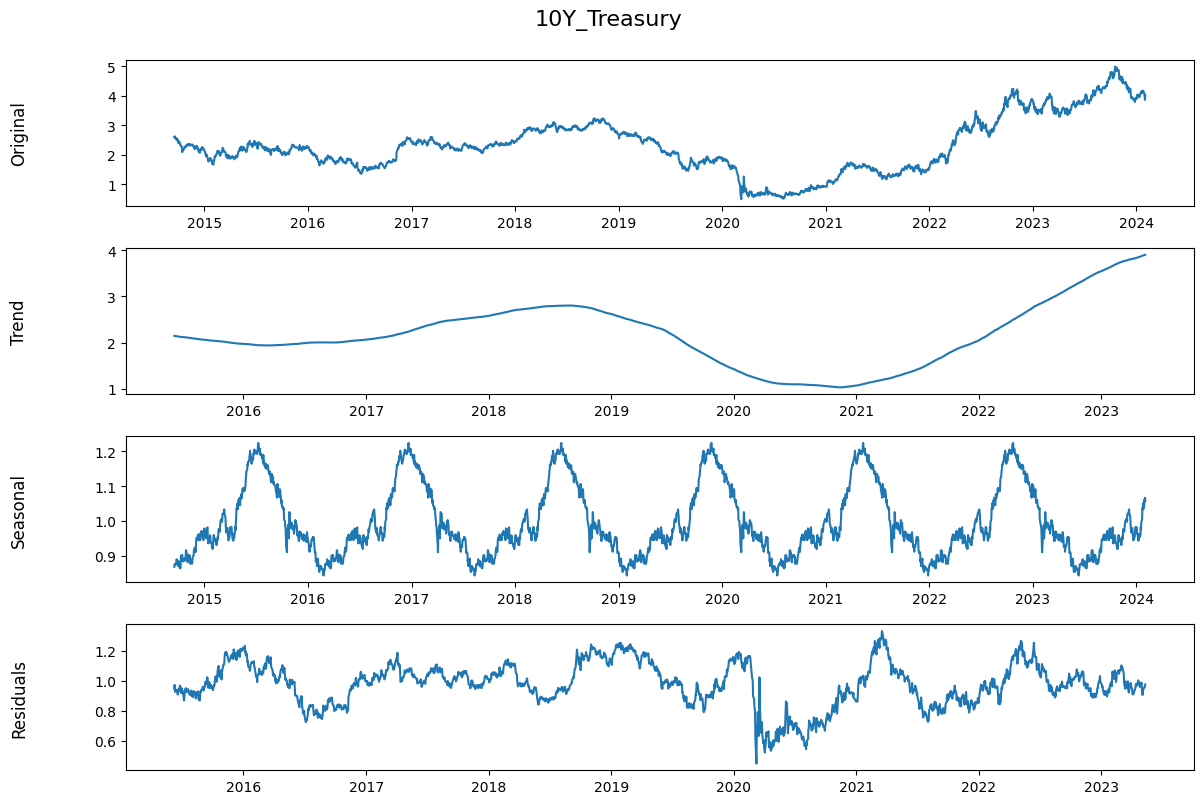

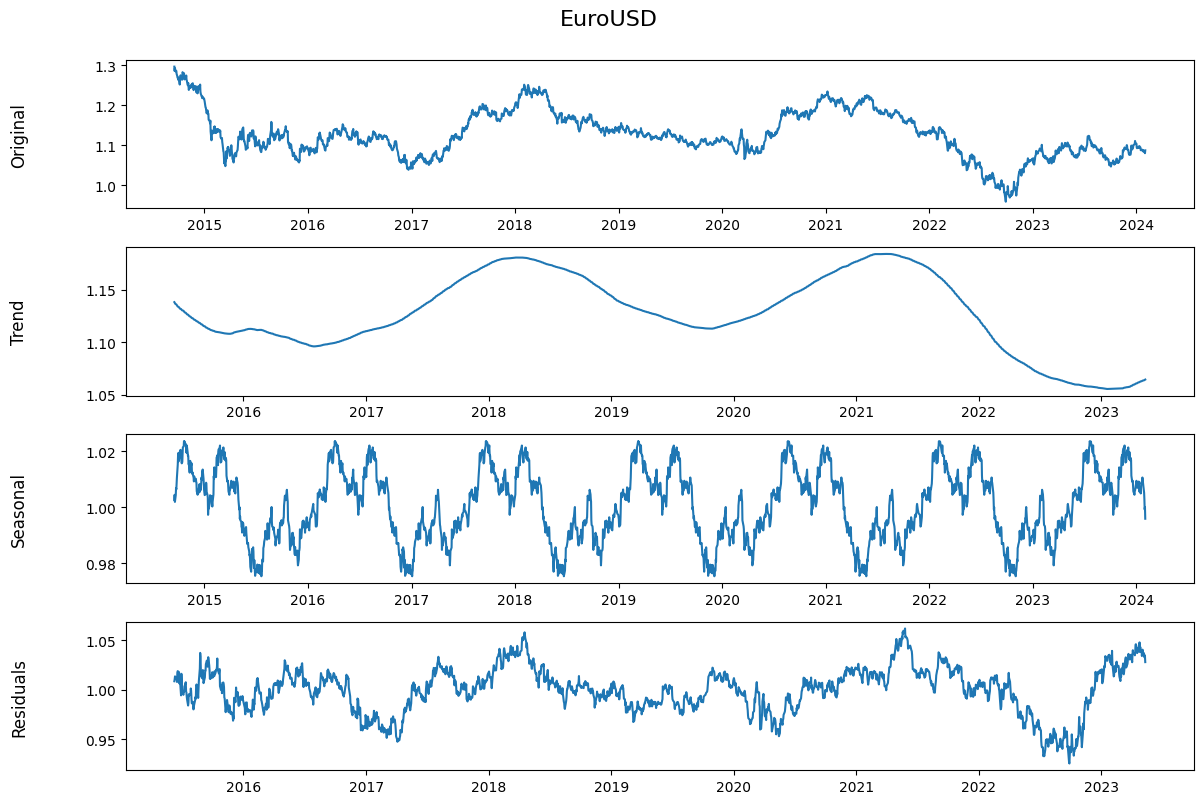

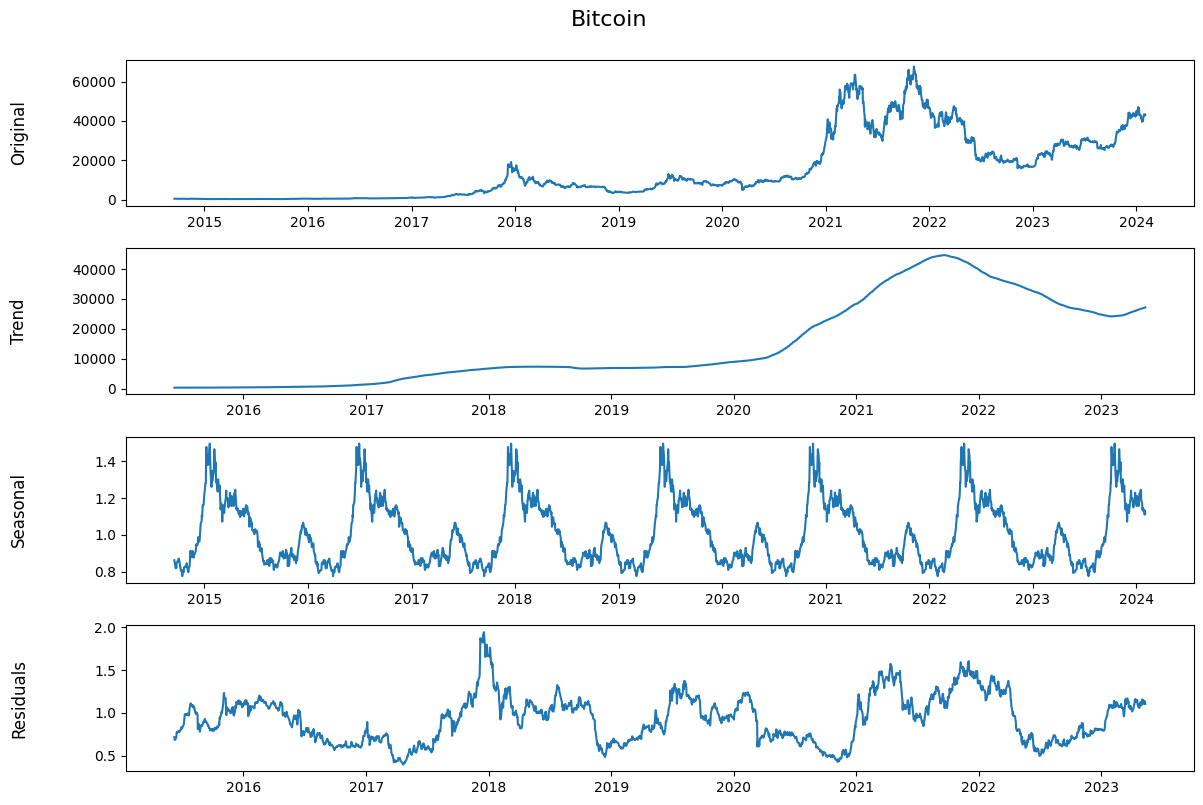

In [38]:
seasonal_period = 365  

for column in df:
    result = seasonal_decompose(df[column], model='multiplicative', period=seasonal_period)

    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # visualization
    plt.figure(figsize=(12, 8))

    plt.suptitle(column, y=1, fontsize=16)

    plt.subplot(411)
    plt.plot(df[column], label='original')
    plt.annotate('Original', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(412)
    plt.plot(trend, label='trend')
    plt.annotate('Trend', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(413)
    plt.plot(seasonal, label='seasonality')
    plt.annotate('Seasonal', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.subplot(414)
    plt.plot(residual, label='residuals')
    plt.annotate('Residuals', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

    plt.tight_layout()
    plt.show()

# Predction ML - ARIMA

### Prepare the data

In [11]:
# S&P 500
SnP = df["S&P500"]
SnP = pd.DataFrame(SnP)
SnP.head()

,S&P500
Date,
2014-09-17,2001.569946
2014-09-18,2011.359985
2014-09-19,2010.400024
2014-09-22,1994.290039
2014-09-23,1982.770020


### Preprocessing the data

In [12]:
# Checking Null value
SnP.isna().sum()

S&P500    0
dtype: int64

In [15]:
# Initial Visualization

SnP.plot
plt.show()

### Checking whether the data is stationary

In [55]:
# Define a function to perform the Augmented Dickey-Fuller (ADF) test
def augmented_dickey_fuller_test(timeseries):
    # Perform the ADF test
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # Print the results
    print('Results of Dickey-Fuller Test:')
    # Create a pandas Series to display the test statistics, p-value, number of lags used, and number of observations used
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    # Add critical values to the Series
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    # Print the Series containing test results
    print(dfoutput)
    
    # Determine stationarity
    if dftest[1] > 0.05:
        print("Is Stationary: No (fail to reject)")
    else:
        print("Is Stationary: Yes (reject)")

# Call the function to perform the ADF test
print(augmented_dickey_fuller_test(SnP['Price']))  


Results of Dickey-Fuller Test:
Test Statistic                   -0.214383
p-value                           0.936785
#Lags Used                       10.000000
Number of Observations Used    2339.000000
Critical Value (1%)              -3.433149
Critical Value (5%)              -2.862776
Critical Value (10%)             -2.567428
dtype: float64
Is Stationary: No (fail to reject)
None


### Making a series stationary - (1)Decomposition

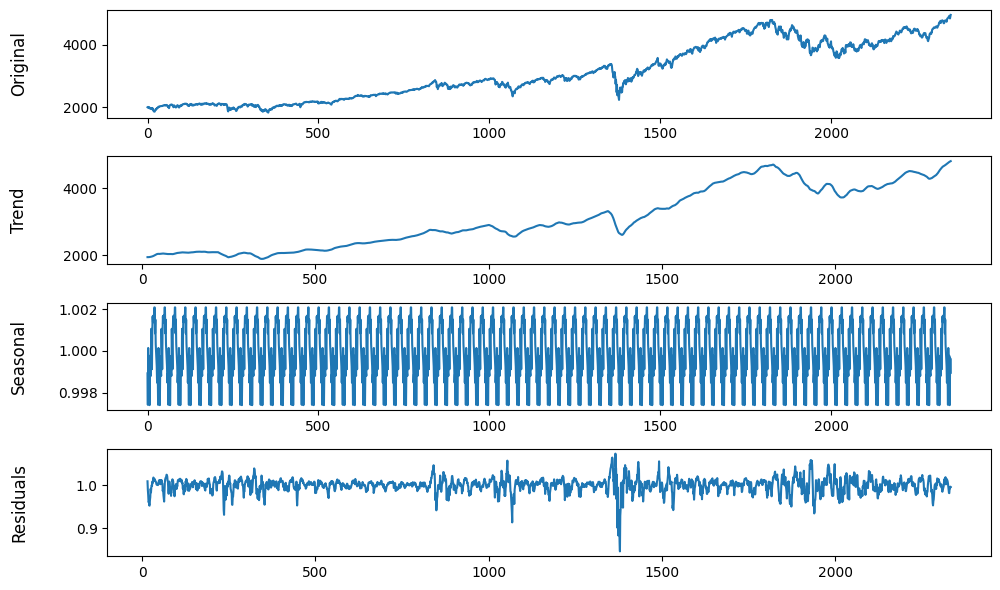

In [56]:
# Time Series Data Decomposition

decomposition = seasonal_decompose(SnP['Price'], model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))

plt.subplot(411)
plt.plot(SnP['Price'], label='original')
plt.annotate('Original', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.annotate('Trend', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.annotate('Seasonal', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

plt.subplot(414)
plt.plot(residual, label='residuals')
plt.annotate('Residuals', xy=(0, 0.5), xytext=(-0.1, 0.5), rotation='vertical',
                 ha='center', va='center', fontsize=12, color='black', xycoords='axes fraction', textcoords='axes fraction')

plt.tight_layout()
plt.show()

In [57]:
# Checking trend's staionary after decomposition : NO

trend.dropna(inplace=True)
augmented_dickey_fuller_test(trend)

Results of Dickey-Fuller Test:
Test Statistic                    0.354442
p-value                           0.979709
#Lags Used                       27.000000
Number of Observations Used    2292.000000
Critical Value (1%)              -3.433206
Critical Value (5%)              -2.862802
Critical Value (10%)             -2.567442
dtype: float64
Is Stationary: No (fail to reject)


### Making a series stationary - (2)Differencing

In [58]:
differenced = SnP['Price'].diff().dropna()
fig = px.line(differenced)
fig.show()

In [59]:
# ADF test after Differencing : Stationary

augmented_dickey_fuller_test(differenced)


Results of Dickey-Fuller Test:
Test Statistic                -1.506929e+01
p-value                        8.772474e-28
#Lags Used                     9.000000e+00
Number of Observations Used    2.339000e+03
Critical Value (1%)           -3.433149e+00
Critical Value (5%)           -2.862776e+00
Critical Value (10%)          -2.567428e+00
dtype: float64
Is Stationary: Yes (reject)


# Building up ML model : (1)ARIMA

Now that we have a stationary series, we can move ahead with our forecasting models. We will be using the ARIMA model, which stands for Auto-Regressive Integrative Moving Average for forecasting. 

It is a generalized version of the ARMA model and simply a combination of two distinct Auto-Regressive & Moving Average models.

In [89]:
SnP

,Date,Price
0,2014-09-17,2001.569946
1,2014-09-18,2011.359985
2,2014-09-19,2010.400024
3,2014-09-22,1994.290039
4,2014-09-23,1982.770020
...,...,...
2345,2024-01-29,4927.930176
2346,2024-01-30,4924.970215
2347,2024-01-31,4845.649902
2348,2024-02-01,4906.189941


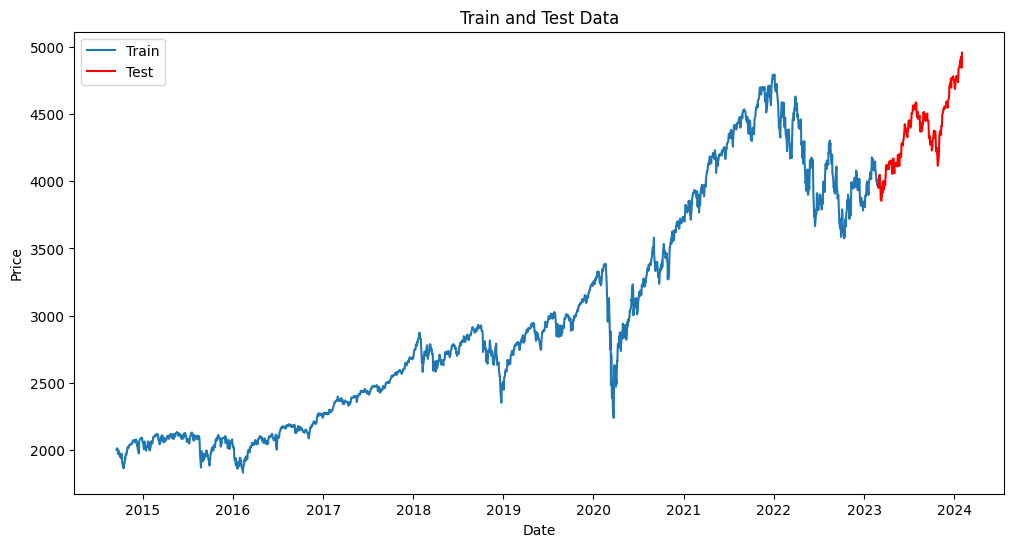

In [133]:
# Seperating Train / Test dataset by 9:1

train_size = int(len(SnP) * 0.9)
train = SnP.iloc[:train_size]
test = SnP.iloc[train_size:]

# Visualization of seperate

plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], c= 'r', label='Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train and Test Data')
plt.legend()
plt.show()



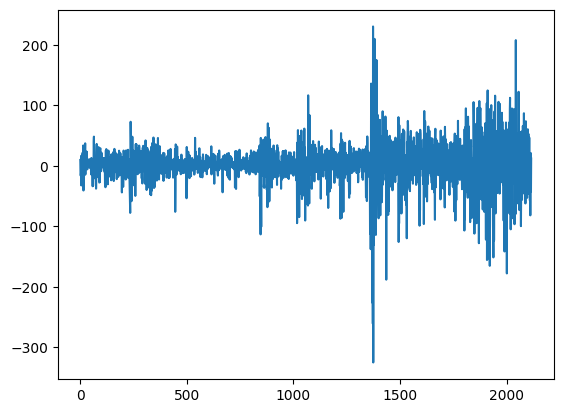


Results of Dickey-Fuller Test:
Test Statistic                -1.445347e+01
p-value                        7.035749e-27
#Lags Used                     9.000000e+00
Number of Observations Used    2.104000e+03
Critical Value (1%)           -3.433462e+00
Critical Value (5%)           -2.862915e+00
Critical Value (10%)          -2.567502e+00
dtype: float64
Is Stationary: Yes (reject)


In [127]:
# Differencing 1st 
diff_1 = train['Price'].diff().dropna()
plt.plot(diff_1)
plt.show()
print()
augmented_dickey_fuller_test(diff_1)

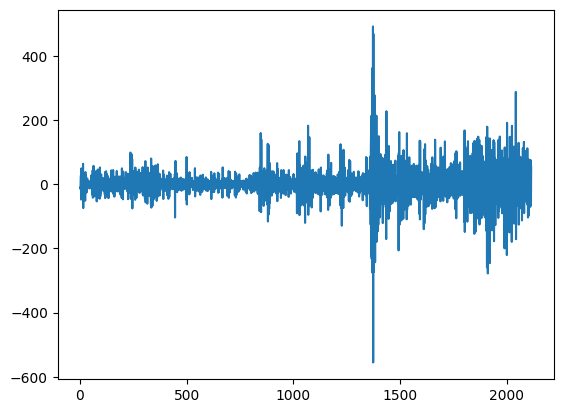


Results of Dickey-Fuller Test:
Test Statistic                -1.458625e+01
p-value                        4.387134e-27
#Lags Used                     2.600000e+01
Number of Observations Used    2.086000e+03
Critical Value (1%)           -3.433489e+00
Critical Value (5%)           -2.862927e+00
Critical Value (10%)          -2.567508e+00
dtype: float64
Is Stationary: Yes (reject)


In [128]:
# Differencing 2nd 
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()
print()
augmented_dickey_fuller_test(diff_2)

#

## Finding the p, d, q values
The autocorrelation plot helps determine the optimal set of q parameters for the Moving Average model.

The partial autocorrelation plot helps determine the optimal set of p parameters for the Auto-Regressive model.

An extended autocorrelation plot of the data confirms whether the combination of the AR and MA terms is required for forecasting.

Akaike’s Information Criterion (AIC) assists in determining the optimal set of p, d, q. Usually, the model with a smaller absolute value of AIC is preferred.

Schwartz Bayesian Information Criterion (BIC) is another alternative of AIC, and lower BIC is better for selecting the optimal p, d, q.

###

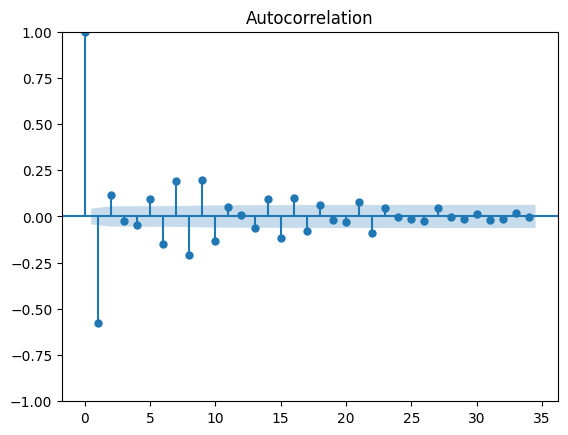

In [129]:
# For finding the AR component p, we need to look for a sharp initial drop in the partial autocorrelation plot. 
# It is happening just after the first peak. So, the p component value can have either 1 or 2.

plot_acf(diff_2)
plt.show()

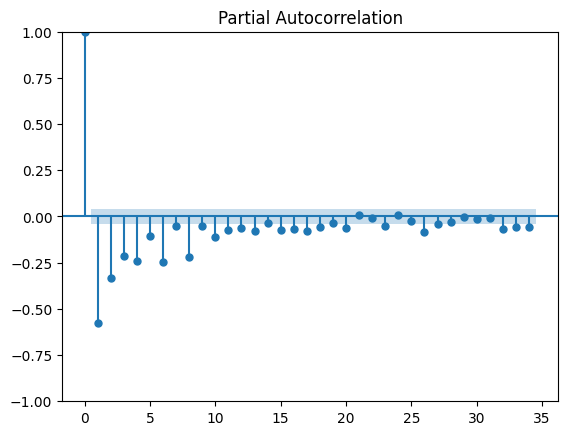

In [130]:
# For finding the q value, we will need to see an exponential decrease in the autocorrelation plot. 
# We are not looking for a drastic change; instead, we are looking for a curve settling down to saturation. 
# We can see it is happening just after 1. So, q can also be taken as either 1 or 2.

plot_pacf(diff_2)
plt.show()

In [135]:
import pmdarima as pm
model = pm.auto_arima(
            y=train['Price'], 
            d=1, 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=1, seasonal=False, 
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21217.676, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21193.179, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21195.826, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21217.065, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21189.653, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=21191.602, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21191.636, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21191.158, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21192.053, Time=2.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=21189.215, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21192.912, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=21191.179, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=21191.203, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21190.821, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0

In [131]:
# Implementing ARIMA(1,2,1) model
model = ARIMA(train['Price'], order=(1,2,1))
results_ARIMA = model.fit()
print(results_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2115
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -10593.032
Date:                Tue, 13 Feb 2024   AIC                          21192.063
Time:                        16:21:15   BIC                          21209.031
Sample:                             0   HQIC                         21198.276
                               - 2115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1112      0.010    -11.009      0.000      -0.131      -0.091
ma.L1         -1.0000      0.034    -29.722      0.000      -1.066      -0.934
sigma2      1319.4200     48.443     27.236      0.0

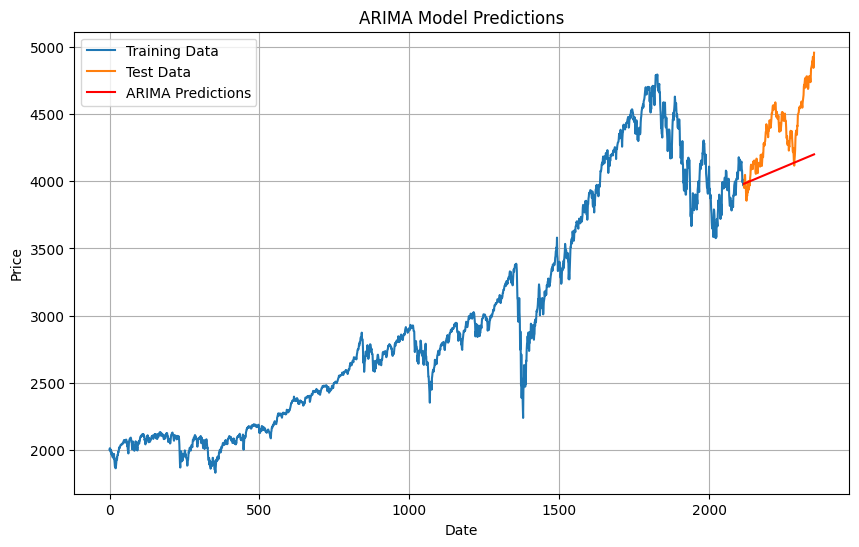

In [132]:
# ARIMA 모델로부터 예측 결과 얻기
predictions = results_ARIMA.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price'], label='Training Data')
plt.plot(test.index, test['Price'], label='Test Data')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Building up ML model : (2)SARIMA

# Building up ML model : (3)Prophet